**Assignment: Housing in Brazil 🇧🇷**

In \[1\]:

    import wqet_grader

    wqet_grader.init("Project 1 Assessment")

In this assignment, you'll work with a dataset of homes for sale in
Brazil. Your goal is to determine if there are regional differences in
the real estate market. Also, you will look at southern Brazil to see if
there is a relationship between home size and price, similar to what you
saw with housing in some states in Mexico.

**Note:** There are are 19 graded tasks in this assignment, but you only
need to complete 18. Once you've successfully completed 18 tasks, you'll
be automatically enrolled in the next project, and this assignment will
be closed. This means that you might not be allowed to complete the last
task. So if you get an error saying that you've already complete the
course, that's good news! Move to project 2.

**Before you start:** Import the libraries you'll use in this notebook:
Matplotlib, pandas, and plotly. Be sure to import them under the aliases
we've used in this project.

In \[2\]:

    # Import Matplotlib, pandas, and plotly

    import matplotlib.pyplot as plt
    import pandas as pd
    import plotly.express as px

# Prepare Data<a href="#Prepare-Data" class="anchor-link">¶</a>

In this assignment, you'll work with real estate data from Brazil. In
the `data` directory for this project there are two CSV that you need to
import and clean.

## Import<a href="#Import" class="anchor-link">¶</a>

**Task 1.5.1:** Import the CSV file `data/brasil-real-estate-1.csv` into
the DataFrame `df1`.

In \[3\]:

    df1 = pd.read_csv("data/brasil-real-estate-1.csv")
    df1.head()

Out\[3\]:

|     | property_type | place_with_parent_names     | region    | lat-lon                | area_m2 | price_usd    |
|-----|---------------|-----------------------------|-----------|------------------------|---------|--------------|
| 0   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6443051,-35.7088142 | 110.0   | \$187,230.85 |
| 1   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6430934,-35.70484   | 65.0    | \$81,133.37  |
| 2   | house         | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6227033,-35.7297953 | 211.0   | \$154,465.45 |
| 3   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.622837,-35.719556   | 99.0    | \$146,013.20 |
| 4   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.654955,-35.700227   | 55.0    | \$101,416.71 |

In \[4\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.1", df1)



🥳

Score: 1

Before you move to the next task, take a moment to inspect `df1` using
the `info` and `head` methods. What issues do you see in the data? What
cleaning will you need to do before you can conduct your analysis?

In \[5\]:

    df1.shape
    df1.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 12834 entries, 0 to 12833
    Data columns (total 6 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   property_type            12834 non-null  object 
     1   place_with_parent_names  12834 non-null  object 
     2   region                   12834 non-null  object 
     3   lat-lon                  11551 non-null  object 
     4   area_m2                  12834 non-null  float64
     5   price_usd                12834 non-null  object 
    dtypes: float64(1), object(5)
    memory usage: 601.7+ KB

**Task 1.5.2:** Drop all rows with `NaN` values from the DataFrame
`df1`.

In \[6\]:

    df1.dropna(inplace = True)
    df1.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 11551 entries, 0 to 12833
    Data columns (total 6 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   property_type            11551 non-null  object 
     1   place_with_parent_names  11551 non-null  object 
     2   region                   11551 non-null  object 
     3   lat-lon                  11551 non-null  object 
     4   area_m2                  11551 non-null  float64
     5   price_usd                11551 non-null  object 
    dtypes: float64(1), object(5)
    memory usage: 631.7+ KB

In \[7\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.2", df1)



Python master 😁

Score: 1

**Task 1.5.3:** Use the `"lat-lon"` column to create two separate
columns in `df1`: `"lat"` and `"lon"`. Make sure that the data type for
these new columns is `float`.

In \[8\]:

    df1[["lat","lon"]] = df1["lat-lon"].str.split(",",expand=True).astype(float)
        
    df1.info()
    df1.head(10)

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 11551 entries, 0 to 12833
    Data columns (total 8 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   property_type            11551 non-null  object 
     1   place_with_parent_names  11551 non-null  object 
     2   region                   11551 non-null  object 
     3   lat-lon                  11551 non-null  object 
     4   area_m2                  11551 non-null  float64
     5   price_usd                11551 non-null  object 
     6   lat                      11551 non-null  float64
     7   lon                      11551 non-null  float64
    dtypes: float64(3), object(5)
    memory usage: 812.2+ KB

Out\[8\]:

|     | property_type | place_with_parent_names     | region    | lat-lon                | area_m2 | price_usd    | lat       | lon        |
|-----|---------------|-----------------------------|-----------|------------------------|---------|--------------|-----------|------------|
| 0   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6443051,-35.7088142 | 110.0   | \$187,230.85 | -9.644305 | -35.708814 |
| 1   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6430934,-35.70484   | 65.0    | \$81,133.37  | -9.643093 | -35.704840 |
| 2   | house         | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6227033,-35.7297953 | 211.0   | \$154,465.45 | -9.622703 | -35.729795 |
| 3   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.622837,-35.719556   | 99.0    | \$146,013.20 | -9.622837 | -35.719556 |
| 4   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.654955,-35.700227   | 55.0    | \$101,416.71 | -9.654955 | -35.700227 |
| 5   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.614414,-35.735621   | 56.0    | \$75,727.07  | -9.614414 | -35.735621 |
| 6   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.584755,-35.662909   | 68.0    | \$110,916.18 | -9.584755 | -35.662909 |
| 7   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.658285,-35.703827   | 187.0   | \$249,641.14 | -9.658285 | -35.703827 |
| 9   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.66082,-35.702976    | 90.0    | \$115,459.02 | -9.660820 | -35.702976 |
| 10  | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6637998,-35.7115455 | 137.0   | \$361,979.65 | -9.663800 | -35.711545 |

In \[9\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.3", df1)



Yes! Great problem solving.

Score: 1

**Task 1.5.4:** Use the `"place_with_parent_names"` column to create a
`"state"` column for `df1`. (Note that the state name always appears
after `"|Brasil|"` in each string.)

In \[10\]:

    df1["state"] = df1["place_with_parent_names"].str.split("|",expand=True)[2]
    df1.head()

Out\[10\]:

|     | property_type | place_with_parent_names     | region    | lat-lon                | area_m2 | price_usd    | lat       | lon        | state   |
|-----|---------------|-----------------------------|-----------|------------------------|---------|--------------|-----------|------------|---------|
| 0   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6443051,-35.7088142 | 110.0   | \$187,230.85 | -9.644305 | -35.708814 | Alagoas |
| 1   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6430934,-35.70484   | 65.0    | \$81,133.37  | -9.643093 | -35.704840 | Alagoas |
| 2   | house         | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.6227033,-35.7297953 | 211.0   | \$154,465.45 | -9.622703 | -35.729795 | Alagoas |
| 3   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.622837,-35.719556   | 99.0    | \$146,013.20 | -9.622837 | -35.719556 | Alagoas |
| 4   | apartment     | \|Brasil\|Alagoas\|Maceió\| | Northeast | -9.654955,-35.700227   | 55.0    | \$101,416.71 | -9.654955 | -35.700227 | Alagoas |

In \[11\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.4", df1)



Boom! You got it.

Score: 1

**Task 1.5.5:** Transform the `"price_usd"` column of `df1` so that all
values are floating-point numbers instead of strings.

In \[12\]:

    df1["price_usd"] = (
        
        df1["price_usd"]
        .str.replace("$","", regex = False)
        .str.replace(",","")
        .astype(float)

    )
    df1.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 11551 entries, 0 to 12833
    Data columns (total 9 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   property_type            11551 non-null  object 
     1   place_with_parent_names  11551 non-null  object 
     2   region                   11551 non-null  object 
     3   lat-lon                  11551 non-null  object 
     4   area_m2                  11551 non-null  float64
     5   price_usd                11551 non-null  float64
     6   lat                      11551 non-null  float64
     7   lon                      11551 non-null  float64
     8   state                    11551 non-null  object 
    dtypes: float64(4), object(5)
    memory usage: 902.4+ KB

In \[13\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.5", df1)



Yes! Keep on rockin'. 🎸That's right.

Score: 1

**Task 1.5.6:** Drop the `"lat-lon"` and `"place_with_parent_names"`
columns from `df1`.

In \[14\]:

    df1.drop(columns=["lat-lon", "place_with_parent_names"], inplace=True)
    df1.head()

Out\[14\]:

|     | property_type | region    | area_m2 | price_usd | lat       | lon        | state   |
|-----|---------------|-----------|---------|-----------|-----------|------------|---------|
| 0   | apartment     | Northeast | 110.0   | 187230.85 | -9.644305 | -35.708814 | Alagoas |
| 1   | apartment     | Northeast | 65.0    | 81133.37  | -9.643093 | -35.704840 | Alagoas |
| 2   | house         | Northeast | 211.0   | 154465.45 | -9.622703 | -35.729795 | Alagoas |
| 3   | apartment     | Northeast | 99.0    | 146013.20 | -9.622837 | -35.719556 | Alagoas |
| 4   | apartment     | Northeast | 55.0    | 101416.71 | -9.654955 | -35.700227 | Alagoas |

In \[15\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.6", df1)



Correct.

Score: 1

**Task 1.5.7:** Import the CSV file `brasil-real-estate-2.csv` into the
DataFrame `df2`.

In \[16\]:

    df2 = pd.read_csv("data/brasil-real-estate-2.csv")

In \[17\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.7", df2)



Excellent work.

Score: 1

Before you jump to the next task, take a look at `df2` using the `info`
and `head` methods. What issues do you see in the data? How is it
similar or different from `df1`?

In \[18\]:

    df2.shape
    df2.info()
    df2.head()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 12833 entries, 0 to 12832
    Data columns (total 7 columns):
     #   Column         Non-Null Count  Dtype  
    ---  ------         --------------  -----  
     0   property_type  12833 non-null  object 
     1   state          12833 non-null  object 
     2   region         12833 non-null  object 
     3   lat            12833 non-null  float64
     4   lon            12833 non-null  float64
     5   area_m2        11293 non-null  float64
     6   price_brl      12833 non-null  float64
    dtypes: float64(4), object(3)
    memory usage: 701.9+ KB

Out\[18\]:

|     | property_type | state      | region    | lat       | lon        | area_m2 | price_brl |
|-----|---------------|------------|-----------|-----------|------------|---------|-----------|
| 0   | apartment     | Pernambuco | Northeast | -8.134204 | -34.906326 | 72.0    | 414222.98 |
| 1   | apartment     | Pernambuco | Northeast | -8.126664 | -34.903924 | 136.0   | 848408.53 |
| 2   | apartment     | Pernambuco | Northeast | -8.125550 | -34.907601 | 75.0    | 299438.28 |
| 3   | apartment     | Pernambuco | Northeast | -8.120249 | -34.895920 | 187.0   | 848408.53 |
| 4   | apartment     | Pernambuco | Northeast | -8.142666 | -34.906906 | 80.0    | 464129.36 |

**Task 1.5.8:** Use the `"price_brl"` column to create a new column
named `"price_usd"`. (Keep in mind that, when this data was collected in
2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In \[19\]:

    df2["price_usd"] = (df2["price_brl"]/3.19).round(2)
    df2.head()

Out\[19\]:

|     | property_type | state      | region    | lat       | lon        | area_m2 | price_brl | price_usd |
|-----|---------------|------------|-----------|-----------|------------|---------|-----------|-----------|
| 0   | apartment     | Pernambuco | Northeast | -8.134204 | -34.906326 | 72.0    | 414222.98 | 129850.46 |
| 1   | apartment     | Pernambuco | Northeast | -8.126664 | -34.903924 | 136.0   | 848408.53 | 265958.79 |
| 2   | apartment     | Pernambuco | Northeast | -8.125550 | -34.907601 | 75.0    | 299438.28 | 93867.80  |
| 3   | apartment     | Pernambuco | Northeast | -8.120249 | -34.895920 | 187.0   | 848408.53 | 265958.79 |
| 4   | apartment     | Pernambuco | Northeast | -8.142666 | -34.906906 | 80.0    | 464129.36 | 145495.10 |

In \[20\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.8", df2)



You got it. Dance party time! 🕺💃🕺💃

Score: 1

**Task 1.5.9:** Drop the `"price_brl"` column from `df2`, as well as any
rows that have `NaN` values.

In \[21\]:

    df2.drop(columns=["price_brl"], inplace=True)
    df2.dropna(inplace=True)
    df2.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 11293 entries, 0 to 12832
    Data columns (total 7 columns):
     #   Column         Non-Null Count  Dtype  
    ---  ------         --------------  -----  
     0   property_type  11293 non-null  object 
     1   state          11293 non-null  object 
     2   region         11293 non-null  object 
     3   lat            11293 non-null  float64
     4   lon            11293 non-null  float64
     5   area_m2        11293 non-null  float64
     6   price_usd      11293 non-null  float64
    dtypes: float64(4), object(3)
    memory usage: 705.8+ KB

In \[22\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.9", df2)



Yes! Your hard work is paying off.

Score: 1

**Task 1.5.10:** Concatenate `df1` and `df2` to create a new DataFrame
named `df`.

In \[39\]:

    df = pd.concat([df1,df2])
    print("df shape:", df.shape)
    df.head()

    df shape: (22844, 7)

Out\[39\]:

|     | property_type | region    | area_m2 | price_usd | lat        | lon        | state   |
|-----|---------------|-----------|---------|-----------|------------|------------|---------|
| 0   | apartment     | Northeast | 110.0   | 187230.85 | -9.644305  | -35.708814 | Alagoas |
| 1   | apartment     | Northeast | 65.0    | 81133.37  | -9.643093  | -35.704840 | Alagoas |
| 2   | house         | Northeast | 211.0   | 154465.45 | -9.622703  | -35.729795 | Alagoas |
| 3   | apartment     | Northeast | 99.0    | 146013.20 | -9.622837  | -35.719556 | Alagoas |
| 4   | apartment     | Northeast | 55.0    | 101416.71 | -9.654955  | -35.700227 | Alagoas |
| ... | ...           | ...       | ...     | ...       | ...        | ...        | ...     |
| 224 | apartment     | Northeast | 143.0   | 296448.85 | -12.941992 | -38.403465 | Bahia   |
| 225 | apartment     | Northeast | 158.0   | 180989.82 | -12.941992 | -38.403465 | Bahia   |
| 226 | apartment     | Northeast | 75.0    | 77388.75  | -12.999527 | -38.462650 | Bahia   |
| 227 | apartment     | Northeast | 128.0   | 235843.06 | -12.982230 | -38.438980 | Bahia   |
| 228 | house         | Northeast | 156.0   | 193471.88 | -12.852844 | -38.327110 | Bahia   |

200 rows × 7 columns

In \[24\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.10", df)



You = coding 🥷

Score: 1

**Frequent Question:** I can't pass this question, and I don't know what
I've done wrong. 😠 What's happening?

**Tip:** In this assignment, you're working with data that's similar —
but not identical — the data used in the lessons. That means that you
might need to make adjust the code you used in the lessons to work here.
Take a second look at `df1` after you complete 1.5.6, and make sure
you've correctly created the state names.

## Explore<a href="#Explore" class="anchor-link">¶</a>

It's time to start exploring your data. In this section, you'll use your
new data visualization skills to learn more about the regional
differences in the Brazilian real estate market.

Complete the code below to create a `scatter_mapbox` showing the
location of the properties in `df`.

In \[25\]:

    fig = px.scatter_mapbox(
        df,
        lat="lat",
        lon="lon",
        center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
        width=600,
        height=600,
        hover_data=["price_usd"],  # Display price when hovering mouse over house
    )

    fig.update_layout(mapbox_style="open-street-map")

    fig.show()

**Task 1.5.11:** Use the `describe` method to create a DataFrame
`summary_stats` with the summary statistics for the `"area_m2"` and
`"price_usd"` columns.

In \[26\]:

    summary_stats = df[["area_m2","price_usd"]].describe()
    summary_stats

Out\[26\]:

|       | area_m2      | price_usd     |
|-------|--------------|---------------|
| count | 22844.000000 | 22844.000000  |
| mean  | 115.020224   | 194987.315515 |
| std   | 47.742932    | 103617.682979 |
| min   | 53.000000    | 74892.340000  |
| 25%   | 76.000000    | 113898.770000 |
| 50%   | 103.000000   | 165697.555000 |
| 75%   | 142.000000   | 246900.882500 |
| max   | 252.000000   | 525659.720000 |

In \[27\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.11", summary_stats)



Party time! 🎉🎉🎉

Score: 1

**Task 1.5.12:** Create a histogram of `"price_usd"`. Make sure that the
x-axis has the label `"Price [USD]"`, the y-axis has the label
`"Frequency"`, and the plot has the title
`"Distribution of Home Prices"`.

In \[83\]:

    plt.hist(df["price_usd"])
    plt.xlabel("Price [USD]")
    plt.ylabel("Frequency")
    plt.title("Distribution of Home Prices")

    # Don't change the code below
    plt.savefig("images/1-5-12.png", dpi=150)

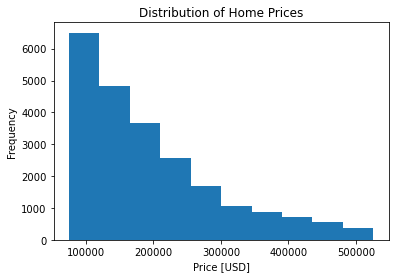

In \[84\]:

    with open("images/1-5-12.png", "rb") as file:
        wqet_grader.grade("Project 1 Assessment", "Task 1.5.12", file)



🥳

Score: 1

**Task 1.5.13:** Create a horizontal boxplot of `"area_m2"`. Make sure
that the x-axis has the label `"Area [sq meters]"` and the plot has the
title `"Distribution of Home Sizes"`.

In \[30\]:

    # Don't change the code below
    plt.savefig("images/1-5-13.png", dpi=150)

    plt.boxplot(df["area_m2"], vert=False)
    plt.xlabel("Area [sq meters]")
    plt.title("Distribution of Home Sizes")

Out\[30\]:

    Text(0.5, 1.0, 'Distribution of Home Sizes')

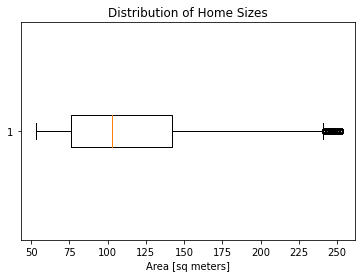

In \[31\]:

    with open("images/1-5-13.png", "rb") as file:
        wqet_grader.grade("Project 1 Assessment", "Task 1.5.13", file)



Party time! 🎉🎉🎉

Score: 1

**Task 1.5.14:** Use the `groupby` method to create a Series named
`mean_price_by_region` that shows the mean home price in each region in
Brazil, sorted from smallest to largest.

In \[64\]:

    mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values(ascending =True)
    mean_price_by_region

Out\[64\]:

    region
    Central-West    178596.283663
    North           181308.958188
    Northeast       185422.985482
    South           189012.345360
    Southeast       208996.762761
    Name: price_usd, dtype: float64

In \[68\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.14", mean_price_by_region)



Very impressive.

Score: 1

**Task 1.5.15:** Use `mean_price_by_region` to create a bar chart. Make
sure you label the x-axis as `"Region"` and the y-axis as
`"Mean Price [USD]"`, and give the chart the title
`"Mean Home Price by Region"`.

In \[89\]:

    mean_price_by_region.plot(
        kind="bar",
        xlabel= "Region",
        ylabel = "Mean Price [USD]",
        title = "Mean Home Price by Region"
    );

    # Don't change the code below
    plt.savefig("images/1-5-15.png", dpi=150)

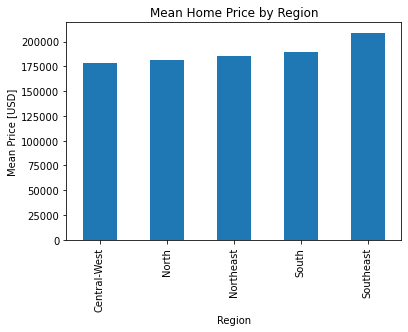

In \[82\]:

    with open("images/1-5-15.png", "rb") as file:
        wqet_grader.grade("Project 1 Assessment", "Task 1.5.15", file)



Python master 😁

Score: 1

**Keep it up!** You're halfway through your data exploration. Take one
last break and get ready for the final push. 🚀

You're now going to shift your focus to the southern region of Brazil,
and look at the relationship between home size and price.

**Task 1.5.16:** Create a DataFrame `df_south` that contains all the
homes from `df` that are in the `"South"` region.

In \[71\]:

    df_south = df.loc[(df["region"]=="South")]
    df_south.head()

Out\[71\]:

|      | property_type | region | area_m2 | price_usd | lat        | lon        | state  |
|------|---------------|--------|---------|-----------|------------|------------|--------|
| 9304 | apartment     | South  | 127.0   | 296448.85 | -25.455704 | -49.292918 | Paraná |
| 9305 | apartment     | South  | 104.0   | 219996.25 | -25.455704 | -49.292918 | Paraná |
| 9306 | apartment     | South  | 100.0   | 194210.50 | -25.460236 | -49.293812 | Paraná |
| 9307 | apartment     | South  | 77.0    | 149252.94 | -25.460236 | -49.293812 | Paraná |
| 9308 | apartment     | South  | 73.0    | 144167.75 | -25.460236 | -49.293812 | Paraná |

In \[72\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.16", df_south)



You = coding 🥷

Score: 1

**Task 1.5.17:** Use the `value_counts` method to create a Series
`homes_by_state` that contains the number of properties in each state in
`df_south`.

In \[80\]:

    homes_by_state = df_south["state"].value_counts()
    homes_by_state

Out\[80\]:

    Rio Grande do Sul    2643
    Santa Catarina       2634
    Paraná               2544
    Name: state, dtype: int64

In \[74\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.17", homes_by_state)



Yes! Great problem solving.

Score: 1

**Task 1.5.18:** Create a scatter plot showing price vs. area for the
state in `df_south` that has the largest number of properties. Be sure
to label the x-axis `"Area [sq meters]"` and the y-axis `"Price [USD]"`;
and use the title `"<name of state>: Price vs. Area"`.

In \[90\]:

    df_Rio_Grande_do_Sul = df[df["state"]=='Rio Grande do Sul']

    plt.scatter(x=df_Rio_Grande_do_Sul["area_m2"], y=df_Rio_Grande_do_Sul["price_usd"])
    plt.xlabel("Area [sq meters]")
    plt.ylabel("Price [USD]")
    plt.title("<name of state>: Price vs. Area")

    # Don't change the code below
    plt.savefig("images/1-5-18.png", dpi=150)

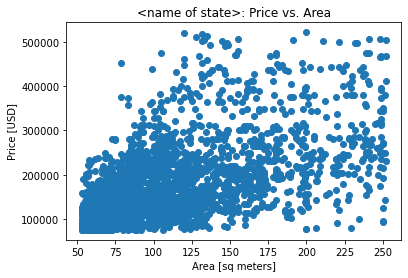

In \[91\]:

    with open("images/1-5-18.png", "rb") as file:
        wqet_grader.grade("Project 1 Assessment", "Task 1.5.18", file)

    ---------------------------------------------------------------------------
    Exception                                 Traceback (most recent call last)
    Input In [91], in <cell line: 1>()
          1 with open("images/1-5-18.png", "rb") as file:
    ----> 2     wqet_grader.grade("Project 1 Assessment", "Task 1.5.18", file)

    File /opt/conda/lib/python3.9/site-packages/wqet_grader/__init__.py:180, in grade(assessment_id, question_id, submission)
        175 def grade(assessment_id, question_id, submission):
        176   submission_object = {
        177     'type': 'simple',
        178     'argument': [submission]
        179   }
    --> 180   return show_score(grade_submission(assessment_id, question_id, submission_object))

    File /opt/conda/lib/python3.9/site-packages/wqet_grader/transport.py:143, in grade_submission(assessment_id, question_id, submission_object)
        141     raise Exception('Grader raised error: {}'.format(error['message']))
        142   else:
    --> 143     raise Exception('Could not grade submission: {}'.format(error['message']))
        144 result = envelope['data']['result']
        146 # Used only in testing

    Exception: Could not grade submission: Could not verify access to this assessment: Received error from WQET submission API: You have already passed this course!

**Task 1.5.19:** Create a dictionary `south_states_corr`, where the keys
are the names of the three states in the `"South"` region of Brazil, and
their associated values are the correlation coefficient between
`"area_m2"` and `"price_usd"` in that state.

As an example, here's a dictionary with the states and correlation
coefficients for the Southeast region. Since you're looking at a
different region, the states and coefficients will be different, but the
structure of the dictionary will be the same.

    {'Espírito Santo': 0.6311332554173303,
     'Minas Gerais': 0.5830029036378931,
     'Rio de Janeiro': 0.4554077103515366,
     'São Paulo': 0.45882050624839366}

In \[62\]:

    df_parana = df[df["state"]=='Paraná']
    df_santa_catarina = df[df["state"]=='Santa Catarina']
    df_Rio_Grande_do_Sul = df[df["state"]=='Rio Grande do Sul']

    south_states_corr = {
        'Paraná' : df_parana["area_m2"].corr(df_parana["price_usd"]),
        'Santa Catarina' : df_santa_catarina["area_m2"].corr(df_santa_catarina["price_usd"]),
        'Rio Grande do Sul' : df_Rio_Grande_do_Sul["area_m2"].corr(df_Rio_Grande_do_Sul["price_usd"])
    }

    south_states_corr

Out\[62\]:

    {'Paraná': 0.5436659935502659,
     'Santa Catarina': 0.5068121769989853,
     'Rio Grande do Sul': 0.5773267433871903}

In \[63\]:

    wqet_grader.grade("Project 1 Assessment", "Task 1.5.19", south_states_corr)



Yes! Keep on rockin'. 🎸That's right.

Score: 1

------------------------------------------------------------------------

Copyright © 2022 WorldQuant University. This content is licensed solely
for personal use. Redistribution or publication of this material is
strictly prohibited.